## Quick Revisions

Before we jump looking into cost function of logistic regression, lets quickly revise concavity and convexity of functions.

## Concave function
A function is said to be concave if the line segment joining any two points on the graph of the function lies below the graph. In other words, a function is concave if its second derivative is negative everywhere. Mathematically, for a given function $f(x)$, if $f''(x) < 0$ for all $x \in domain of \: f(x)$, then $f(x)$ is concave.
Also given $\lambda$ and 2 points $x_1$ and $x_2$ on the graph of f(x), the following inequality holds true:
$$f(\lambda x_1 + (1-\lambda)x_2) \geq \lambda f(x_1) + (1-\lambda)f(x_2)$$



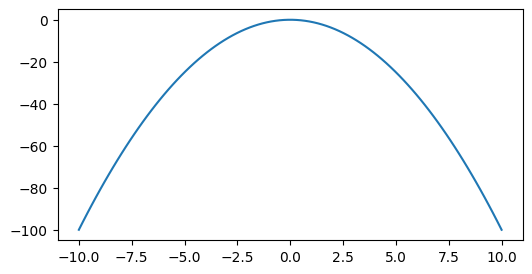

In [1]:
## Here is an example of a concave function
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)
def f_concave(x):
    return -x**2

plt.figure(figsize=(6, 3)) 
plt.plot(x, f_concave(x))

::: {.callout-tip title="Properties of Concave Functions"}
- Second derivative is negative everywhere
- A concave function has a global maximum at the point where the first derivative is zero
:::

## Convex function
A function is said to be convex if the line segment joining any two points on the graph of the function lies above the graph. In other words, a function is convex if its second derivative is positive everywhere. Mathematically, for a given function $f(x)$, if $f''(x) > 0$ for all $x \in domain of \: f(x)$, then $f(x)$ is convex.
Also given $\lambda$ and 2 points $x_1$ and $x_2$ on the graph of f(x), the following inequality holds true:
$$f(\lambda x_1 + (1-\lambda)x_2) \leq \lambda f(x_1) + (1-\lambda)f(x_2)$$

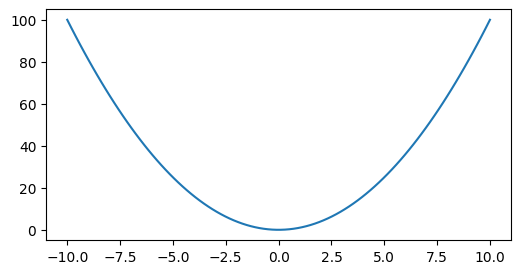

In [2]:
## Here is an example of a convex function
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)
def f_convex(x):
    return x**2

plt.figure(figsize=(6, 3)) 
plt.plot(x, f_convex(x))

::: {.callout-tip title="Properties of Convex Functions"}
- Second derivative is positive everywhere
- A convex function has a global minimum at the point where the first derivative is zero
:::

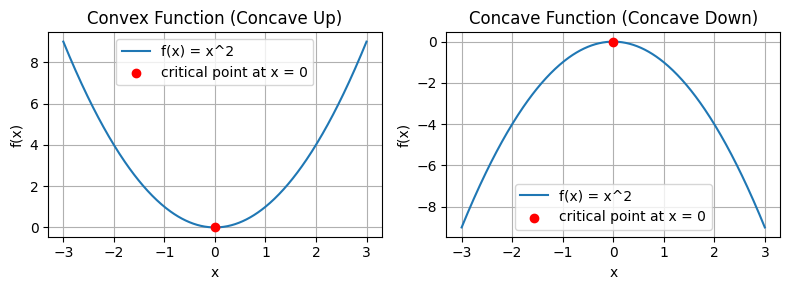

In [3]:
#|code-fold: true
import numpy as np
import matplotlib.pyplot as plt

# Define the functions
def convex_function(x):
    return x**2

def concave_function(x):
    return -x**2

# Generate x values
x = np.linspace(-3, 3, 400)

# Calculate y values for each function
y_convex = convex_function(x)
y_concave = concave_function(x)

# Create the plots
#plt.figure(figsize=(14, 6))
plt.figure(figsize=(8, 3)) 

# Plot convex function
plt.subplot(1, 2, 1)
plt.plot(x, y_convex, label='f(x) = x^2')
plt.scatter(0, convex_function(0), color='red', zorder=5)  # Global minimum at x = 0
plt.title('Convex Function (Concave Up)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
## add legend for the critical point
plt.legend(['f(x) = x^2', 'critical point at x = 0'])

# Plot concave function
plt.subplot(1, 2, 2)
plt.plot(x, y_concave, label='f(x) = -x^2')
plt.scatter(0, concave_function(0), color='red', zorder=5)  # Global maximum at x = 0
plt.title('Concave Function (Concave Down)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.legend(['f(x) = x^2', 'critical point at x = 0'])

plt.grid(True)
plt.tight_layout()

plt.show()



## Cost Function of Logistic Regression

Quick recap
$$ \hat{y} = \sigma(w^T x + b), \: where \: \sigma(z) = 1/(1+ \exp(-z))$$
Given observations $\{ (x^{(1)},y^{(1)}, (x^{(2)},y^{(2)}, ..., (x^{(m)},y^{(m)}  ) \}$, we want $\hat{y}^{(i)} = y^{(i)}$


**Choices of Loss function:**


- Mean Squared Error: $L(y,\hat{y}) = (y-\hat{y})^2$
- Logistic Loss: $L(y,\hat{y}) = -[y \log(\hat{y}) + (1-y) \log(1-\hat{y})$]

**How does the logistic regression loss behave?**

Lets see through some plots


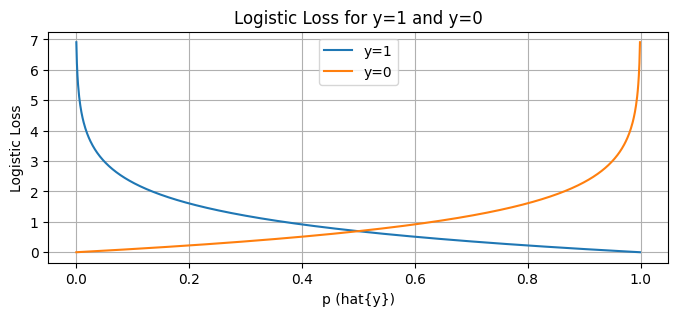

In [7]:
def logistic_loss(y,p):
    return -y*np.log(p)-(1-y)*np.log(1-p)

p = np.linspace(0.001, 0.999, 1000)
## logistic loss for y = 1
loss_y1 = logistic_loss(1, p)
## logistic loss for y = 0
loss_y0 = logistic_loss(0, p)

plt.figure(figsize=(8, 3))
plt.plot(p, loss_y1, label='y=1')
plt.plot(p, loss_y0, label='y=0')
plt.xlabel('p (hat{y})')
plt.ylabel('Logistic Loss')
plt.legend()
plt.title('Logistic Loss for y=1 and y=0')
plt.grid(True)


::: {.callout-tip title="Quick note"}
- Suppose $y=1$, then $L(y,\hat{y}) = -\log(\hat{y})$  We are minimising the loss, hence we want to make $\log(\hat{y})$  as large as possible and in turn $\hat{y}$ as large as possible
- Suppose $y=0$, then $L(y,\hat{y}) = -\log(1-\hat{y})$  We are minimising the loss, hence we want to make $\log(1-\hat{y})$  as large as possible and in turn we want to make $\hat{y}$ as small as possible

:::

## Cost function

Given observations $\{ (x^{(1)},y^{(1)}, (x^{(2)},y^{(2)}, ..., (x^{(m)},y^{(m)}  ) \}$, we want $\hat{y}^{(i)} = y^{(i)}$


**Cost Function is defined as:**

\begin{align*}
J(w,b) &= \frac{1}{m} \sum_{i=1}^{m} L(y^{(i)},\hat{y}^{(i)}) \\
&= -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)}\log(\hat{y}^{(i)}) + (1-y^{(i)})(1-\log(\hat{y}^{(i)}))]
\end{align*}


This is nothing but the average of the logistic loss function over all the training examples. The goal is to find the values of $w$ and $b$ that minimizes the cost function $J(w,b)$.